# Critical Buckling Examples With Varying Boundary Conditions

Thanks the Bardell equations implamentation, composipy is capable of simulating different boundary conditions and different combinations of load cases.



## Importing composipy objects and creating properties

In [2]:
from composipy import OrthotropicMaterial, LaminateProperty
from composipy import PlateStructure
import matplotlib

In [3]:
#Ply Material Properties (MPa and mm)
E1 = 60800
E2 = 58250
v12 = 0.07
G12 = 4550
t = 0.21

# Plate Parameters (mm)
a = 360.
b = 360.
m = 10 # discretization in x direction
n = 10 # discretization in y direction


# Stacking sequence
stacking = [45,-45,0,90,45,-45,0,90,45,-45]
stacking += stacking[::-1] # symmetry

In [4]:
# Ply material and laminate property objects

ply_1 = OrthotropicMaterial(E1, E2, v12, G12, t)
l1 = LaminateProperty(stacking, ply_1)

## Pinned Nxx

In [5]:
panel_SSSS = PlateStructure(l1, a, b, m=m, n=n, Nxx=-1,constraints='PINNED')

In [6]:
eigvals, eigvecs = panel_SSSS.buckling_analysis()

In [7]:
eigvals

array([ 97.04915682, 144.47730786, 246.83882036, 388.19669784,
       393.21258067])

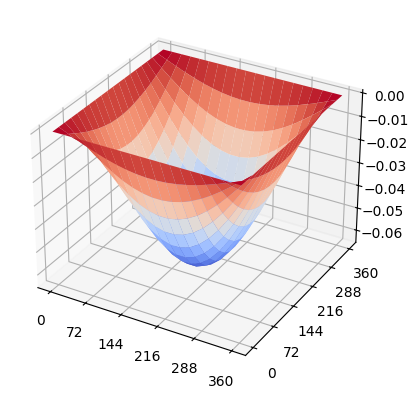

In [8]:
panel_SSSS.plot_eigenvalue()

## Clamped Nxy and Nyy

In [9]:
panel_CCCC = PlateStructure(l1, a, 1.5*b, m=m, n=n, Nxy=-1, Nyy=-1, constraints='CLAMPED')

In [10]:
panel_CCCC.buckling_analysis()

(array([138.79310181, 146.27293322, 214.40196835, 235.95368935,
        345.90300267]),
 array([[ 1.51739732e-12,  1.28381179e+00, -1.78192758e+00,
         -7.23164860e-14, -1.12734335e+00],
        [ 4.78203748e+00, -6.29390333e-12, -6.72047487e-13,
         -2.66381399e+00,  4.63981379e-13],
        [-7.16871007e-12, -5.23231059e+00, -2.78814793e+00,
         -5.30578492e-13, -4.26107290e+00],
        [-3.49928726e+00,  4.63015818e-12, -2.52287774e-13,
         -5.68459201e+00,  1.19791562e-12],
        [ 3.58135743e-12,  2.39465165e+00,  5.81817283e+00,
         -7.70567107e-13, -2.06455886e+00],
        [ 8.68863252e-01, -1.16508079e-12,  3.58178764e-13,
          6.47556953e+00, -1.44772677e-12],
        [-6.33854080e-13, -4.09877859e-01, -2.89496525e+00,
          1.64304360e-12,  7.26371688e+00],
        [-1.08720000e-01,  1.42753311e-13, -1.22023051e-13,
         -2.48027907e+00,  6.74756344e-13],
        [ 1.29018324e-13,  4.89715596e-02,  6.53499900e-01,
         -9.91644884

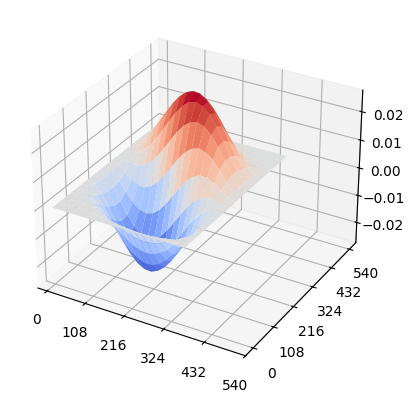

In [11]:
panel_CCCC.plot_eigenvalue()
%matplotlib inline

## Free edge Nxx (custom boundary condition)

In [12]:
constraints={
                'x0': ['TX', 'TY', 'TZ'],
                'xa': ['TX', 'TY', 'TZ'],
                'y0': [],
                'yb': ['TX', 'TY', 'TZ'],
            }
panel_SSFS = PlateStructure(l1, 1.5*a, b, m=m, n=n, Nxx=-1, constraints=constraints)

In [13]:
panel_SSFS.buckling_analysis()

(array([ 20.12080055,  47.13886913,  92.5739614 , 156.53663617,
        185.19779529]),
 array([[-6.64602782e-01, -4.40741305e-01, -3.21998989e-01,
         -2.53957602e-01,  2.36558996e-01],
        [ 7.67084690e-01,  7.01790021e-01,  6.96072097e-01,
          7.09349881e-01, -8.79759269e-01],
        [ 7.06516166e-01,  4.81372557e-01,  3.44176719e-01,
          2.61557308e-01,  7.50390811e-01],
        [-1.38971756e-01, -2.87840954e-01, -3.92644459e-01,
         -4.73238641e-01, -4.20905413e-01],
        [ 4.42080854e-02,  1.62392960e-01,  2.94645688e-01,
          4.15458024e-01, -4.60977406e-01],
        [-1.50662709e-02, -7.48610571e-02, -1.80504923e-01,
         -3.04263494e-01,  2.23427086e-01],
        [ 1.36890277e-03,  2.55831272e-02,  8.89360034e-02,
          1.84715624e-01, -2.88094707e-02],
        [-4.00849531e-03, -1.01944714e-02, -4.16728394e-02,
         -1.04747497e-01,  9.08923204e-03],
        [-2.04950316e-04,  2.13396986e-03,  1.53261755e-02,
          4.82541722

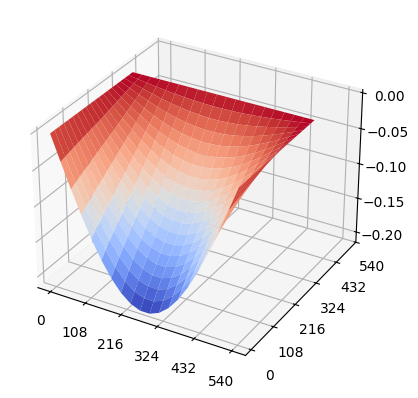

In [14]:
panel_SSFS.plot_eigenvalue()

## Nxy Loading

In [15]:
panel_CCCC_nxy = PlateStructure(l1, a, b, m=m, n=n, Nxy=-1, constraints='CLAMPED')

In [16]:
panel_CCCC_nxy.buckling_analysis()

(array([338.84283307, 389.26571459, 776.82143839, 824.28455938,
        882.94931083]),
 array([[-1.47728432e+00,  8.66469961e-13, -8.43249877e-01,
         -8.79105094e-13,  4.52948835e-13],
        [-1.26889124e-12, -2.09226163e+00,  1.95279903e-12,
         -1.30314642e+00,  9.81823952e-01],
        [ 9.95721068e-01, -5.05387722e-13,  1.11385518e-01,
          3.53651132e-13, -2.31531509e-12],
        [ 4.18985159e-13,  6.80148527e-01, -5.81756865e-13,
          6.51084994e-02, -1.46811101e+00],
        [-3.01802434e-01,  3.03732044e-13,  3.24308478e-01,
          8.57925436e-14,  1.08075394e-12],
        [-1.27116416e-13, -1.33387414e-01,  2.46578800e-13,
          1.90512102e-01,  6.91947740e-01],
        [ 1.26145071e-02,  2.46543285e-14, -2.07071433e-01,
         -8.23047798e-14, -3.28537446e-13],
        [ 1.99830929e-14,  1.41312646e-02,  3.60404415e-13,
         -8.01887995e-02, -1.30219392e-01],
        [ 4.92212764e-04, -9.29836479e-15,  3.83715518e-02,
          1.65668472

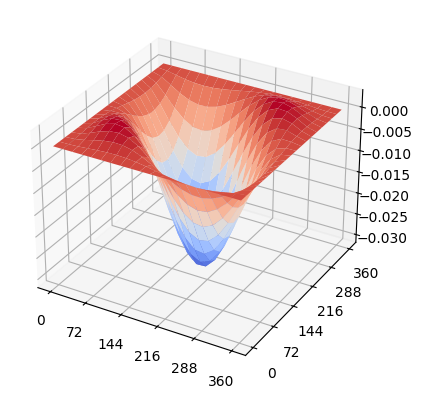

In [17]:
panel_CCCC_nxy.plot_eigenvalue()